In [36]:
# File renaming for consistency
import os
from os import path

for count, filename in enumerate(os.listdir("deadlift2")):
    src = "deadlift2/" + filename
    string = "deadlift2/deadlift_" + str(count) + ".jpg"
    os.rename(src, string)

In [59]:
import os
from os import path

for count,file in enumerate(os.listdir("dataset/test/deadlift")):
    print(file)

deadlift_11.jpg
deadlift_12.jpg
deadlift_121.jpg
deadlift_125.jpg
deadlift_134.jpg
deadlift_135.jpg
deadlift_141.jpg
deadlift_157.jpg
deadlift_158.jpg
deadlift_17.jpg
deadlift_171.jpg
deadlift_172.jpg
deadlift_173.jpg
deadlift_182.jpg
deadlift_190.jpg
deadlift_192.jpg
deadlift_193.jpg
deadlift_195.jpg
deadlift_20.jpg
deadlift_21.jpg
deadlift_24.jpg
deadlift_31.jpg
deadlift_33.jpg
deadlift_34.jpg
deadlift_4.jpg
deadlift_43.jpg
deadlift_53.jpg
deadlift_70.jpg
deadlift_72.jpg
deadlift_74.jpg
deadlift_75.jpg
deadlift_80.jpg
deadlift_83.jpg
deadlift_85.jpg
deadlift_9.jpg
deadlift_94.jpg
deadlift_96.jpg


https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

In [8]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

folder = "train/"

photos = []
labels = []

for file in listdir(folder):
    output = 0
    if "squat" in file:
        output = 1
    if "deadlift" in file:
        output = 2
    photo = load_img(folder + file, target_size=(150,150))
    photo = img_to_array(photo)
    labels.append(output)
    photos.append(photo)

photos = asarray(photos)
labels = asarray(labels)
save("train_photos.npy", photos)
save("train_labels.npy", labels)

In [11]:
import numpy as np
photos = np.load("test_photos.npy",allow_pickle=True)
labels = np.load("test_labels.npy",allow_pickle=True)
print(np.array(photos[0]))

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [42]:
# Directory Generation
from os import makedirs
dataset_home = "dataset/"
subdirs = ["train/", "test/"]
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ["bench/", "squat/", "deadlift/"]
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir)

In [46]:
# Segment into testing and training images
import random
from shutil import copyfile
random.seed(1)
ratio = 0.2
dataset_home = "dataset/"
src_directory = "images/"
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = "train/"
    if random.random() < ratio:
        dst_dir = "test/"
    if file.startswith("bench"):
        dst = dataset_home + dst_dir + "bench/" + file
    elif file.startswith("squat"):
        dst = dataset_home + dst_dir + "squat/" + file
    else:
        dst = dataset_home + dst_dir + "deadlift/" + file
    copyfile(src, dst)   

Validation Accuracy: 47.525


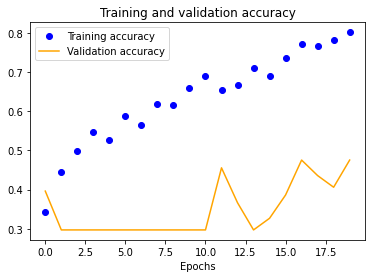

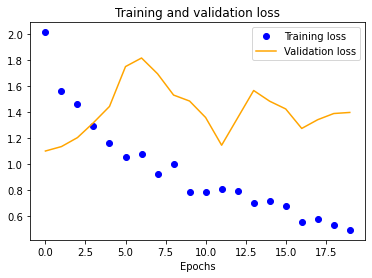

In [78]:
# Baseline CNN Model
import sys
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import skimage.transform

dim = 25
new_shape = (dim,dim,3)
train_photos = np.load("train_photos.npy",allow_pickle=True)
train_labels = np.load("train_labels.npy",allow_pickle=True)
test_photos = np.load("test_photos.npy",allow_pickle=True)
test_labels = np.load("test_labels.npy",allow_pickle=True)

train_labels = to_categorical(train_labels, 3)
test_labels = to_categorical(test_labels, 3)

train_photos_ = np.empty(shape=(train_photos.shape[0],)+new_shape)
for idx in range(train_photos.shape[0]):
    train_photos_[idx] = skimage.transform.resize(train_photos[idx], new_shape)
test_photos_ = np.empty(shape=(test_photos.shape[0],)+new_shape)
for idx in range(test_photos.shape[0]):
    test_photos_[idx] = skimage.transform.resize(test_photos[idx], new_shape)

# 1 Convolutional Layer CNN
def define_model1():
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=new_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 3 Convolutional Layer CNN
def define_model2():
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=new_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 4 Convolutional Layer CNN
def define_model3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=new_shape))
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(3, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    
    plt.figure()
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run_test_harness(model):
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow(train_photos_, train_labels)
    test_it = datagen.flow(test_photos_, test_labels)
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('Validation Accuracy: %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
model = define_model3()
run_test_harness(model)

Train Bench: 121
Train Squat: 166
Train Deadlift: 161
Test Bench: 34
Test Squat: 30
Test Deadlift: 37


Text(0.5, 0.98, 'Deadlift Testing Images')

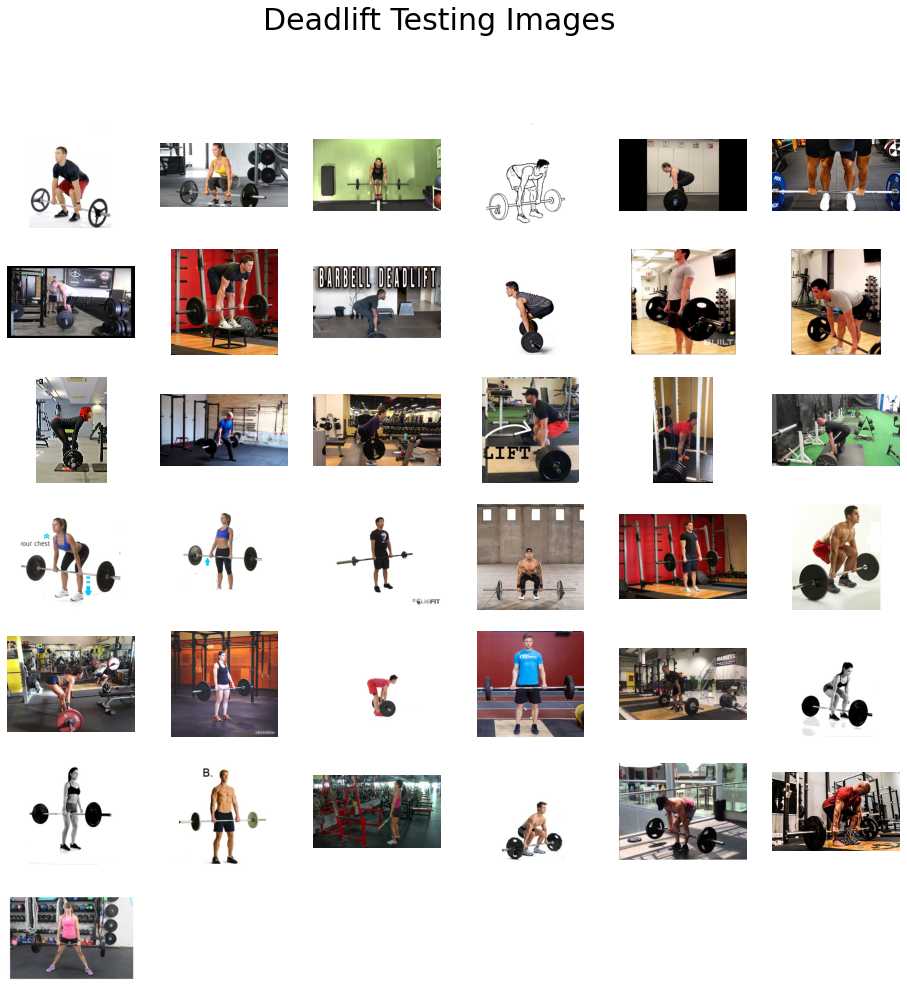

In [134]:
# Testing and training image displaying
import numpy as np
from imageio import imread

# bench = 0
# squat = 1
# deadlift = 2

train_photos = np.load("train_photos.npy",allow_pickle=True)
train_labels = np.load("train_labels.npy",allow_pickle=True)
train_bench = [train_photos[i] for i in [i for i in range(len(train_labels)) if train_labels[i] == 0]]
print(f"Train Bench: {len(train_bench)}")
train_squat = [train_photos[i] for i in [i for i in range(len(train_labels)) if train_labels[i] == 1]]
print(f"Train Squat: {len(train_squat)}")
train_deadlift = [train_photos[i] for i in [i for i in range(len(train_labels)) if train_labels[i] == 2]]
print(f"Train Deadlift: {len(train_deadlift)}")

test_photos = np.load("test_photos.npy",allow_pickle=True)
test_labels = np.load("test_labels.npy",allow_pickle=True)
test_bench = [test_photos[i] for i in [i for i in range(len(test_labels)) if test_labels[i] == 0]]
print(f"Test Bench: {len(test_bench)}")
test_squat = [test_photos[i] for i in [i for i in range(len(test_labels)) if test_labels[i] == 1]]
print(f"Test Squat: {len(test_squat)}")
test_deadlift = [test_photos[i] for i in [i for i in range(len(test_labels)) if test_labels[i] == 2]]
print(f"Test Deadlift: {len(test_deadlift)}")

import os
from os import path

# Train Bench
"""
fig1, axs1 = plt.subplots(13, 10, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("train"):
    if count == len(train_bench):
        if j > 9:
            break
        axs1[i, j].axis("off")
        j += 1
    if "bench" in filename:
        file = "train/" + filename
        img = imread(file)
        if (j <= 9):
            axs1[i, j].imshow(img)
            axs1[i, j].axis("off")
            j += 1
        if (j == 10):
            j = 0
            i += 1
        count += 1
fig1.suptitle("Bench Training Images", fontsize=30)
"""

# Test Bench
"""
fig2, axs2 = plt.subplots(7, 5, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("test"):
    if count == len(test_bench):
        break
    if "bench" in filename:
        file = "test/" + filename
        img = imread(file)
        if (j <= 4):
            axs2[i, j].imshow(img)
            axs2[i, j].axis("off")
            j += 1
        if (j == 5):
            j = 0
            i += 1
        count += 1
axs2[6,4].axis("off")
fig2.suptitle("Bench Testing Images", fontsize=30)
"""

# Train Squat
"""
fig3, axs3 = plt.subplots(12, 14, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("train"):
    if count == len(train_squat):
        if j > 13:
            break
        axs3[i, j].axis("off")
        j += 1
    if "squat" in filename:
        file = "train/" + filename
        img = imread(file)
        if (j <= 13):
            axs3[i, j].imshow(img)
            axs3[i, j].axis("off")
            j += 1
        if (j == 14):
            j = 0
            i += 1
        count += 1
axs3[11,12].axis("off")
axs3[11,13].axis("off")
fig3.suptitle("Squat Training Images", fontsize=30)
"""

# Test Squat
"""
fig4, axs4 = plt.subplots(6, 5, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("test"):
    if count == len(test_squat):
        break
    if "squat" in filename:
        file = "test/" + filename
        img = imread(file)
        if (j <= 4):
            axs4[i, j].imshow(img)
            axs4[i, j].axis("off")
            j += 1
        if (j == 5):
            j = 0
            i += 1
        count += 1
fig4.suptitle("Squat Testing Images", fontsize=30)
"""

# Train Deadlift
"""
fig5, axs5 = plt.subplots(12, 14, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("train"):
    if count == len(train_squat):
        break
    if "deadlift" in filename:
        file = "train/" + filename
        img = imread(file)
        if (j <= 13):
            axs5[i, j].imshow(img)
            axs5[i, j].axis("off")
            j += 1
        if (j == 14):
            j = 0
            i += 1
        count += 1
axs5[11,7].axis("off")
axs5[11,8].axis("off")
axs5[11,9].axis("off")
axs5[11,10].axis("off")
axs5[11,11].axis("off")
axs5[11,12].axis("off")
axs5[11,13].axis("off")
fig5.suptitle("Deadlift Training Images", fontsize=30)
"""

# Test Deadlift
fig6, axs6 = plt.subplots(7, 6, figsize = (16,16))
i = 0
j = 0
count = 0
for filename in os.listdir("test"):
    if count == len(test_deadlift):
        if j > 5:
            break
        axs6[i, j].axis("off")
        j += 1
    if "deadlift" in filename:
        file = "test/" + filename
        img = imread(file)
        if (j <= 5):
            axs6[i, j].imshow(img)
            axs6[i, j].axis("off")
            j += 1
        if (j == 6):
            j = 0
            i += 1
        count += 1
fig6.suptitle("Deadlift Testing Images", fontsize=30)